 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [86]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [87]:
# Reading whale returns
WhaleCsvPath = Path('Resources/whale_returns.csv')
WhaleReturnsDf = pd.read_csv(WhaleCsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
WhaleReturnsDf.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [88]:
#Check size
WhaleReturnsDf.shape

(1060, 4)

In [89]:
# Count nulls
WhaleReturnsDf.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [90]:
# % of null
WhaleReturnsDf.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [91]:
# Drop nulls
WhaleReturnsDf.dropna(inplace = True)

In [92]:
#Check size after drop
WhaleReturnsDf.shape

(1059, 4)

In [93]:
#view
WhaleReturnsDf.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [94]:
# Reading algorithmic returns
AlgoCsvPath = Path('Resources/algo_returns.csv')
AlgoReturnsDf = pd.read_csv(AlgoCsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
AlgoReturnsDf.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [95]:
AlgoReturnsDf.shape

(1241, 2)

In [96]:
# Count nulls
AlgoReturnsDf.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [97]:
# % of null
AlgoReturnsDf.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [98]:
# Drop nulls
AlgoReturnsDf.dropna(inplace = True)

In [99]:
#Check size after drop
AlgoReturnsDf.shape

(1235, 2)

In [100]:
#view
AlgoReturnsDf.head(3)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [101]:
# Reading S&P 500 Closing Prices
SP500CsvPath = Path('Resources/sp500_history.csv')
SP500DataDf = pd.read_csv(SP500CsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
SP500DataDf.head(5)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [102]:
# Check Data Types
SP500DataDf.dtypes

Close    object
dtype: object

In [103]:
#In this case dtypes is not providing the information on datatype and is required to be checked at cell level
SP500DataDf.applymap(type).head(3)

,Close
Date,
2019-04-23,<class 'str'>
2019-04-22,<class 'str'>
2019-04-18,<class 'str'>


In [104]:
#In order to fix data type $ needs to be addressed
SP500DataDf['Close'] = SP500DataDf['Close'].str.replace('$','')

<ipython-input-104-dc837b9b10c3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  SP500DataDf['Close'] = SP500DataDf['Close'].str.replace('$','')


In [105]:
SP500DataDf.head(3)

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03


In [106]:
# Fix Data Types
SP500DataDf['Close'] = SP500DataDf['Close'].astype(str).astype(float)

In [107]:
# Check Data Types
SP500DataDf.applymap(type).head(3)

,Close
Date,
2019-04-23,<class 'float'>
2019-04-22,<class 'float'>
2019-04-18,<class 'float'>


In [108]:
#sort by date
SP500DataDf.sort_index(ascending= True,inplace=True)

In [109]:
#view
SP500DataDf.head(3)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99


In [110]:
# Calculate Daily Returns
SP500ReturnsDf = SP500DataDf.pct_change()

In [111]:
SP500ReturnsDf.head(3)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624


In [112]:
# Drop nulls
SP500ReturnsDf.dropna(inplace = True)

In [113]:
#view
SP500ReturnsDf.head(3)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174


In [114]:
# Rename `Close` Column to be specific to this portfolio.
SP500ReturnsDf.rename(columns = {'Close':'SP500'},inplace =True)

In [115]:
#view
SP500ReturnsDf.head(3)

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174


## Combine Whale, Algorithmic, and S&P 500 Returns

In [116]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
CombinedReturnsDF = pd.concat([WhaleReturnsDf,AlgoReturnsDf,SP500ReturnsDf], axis = 1, join =  'inner' )
CombinedReturnsDF.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

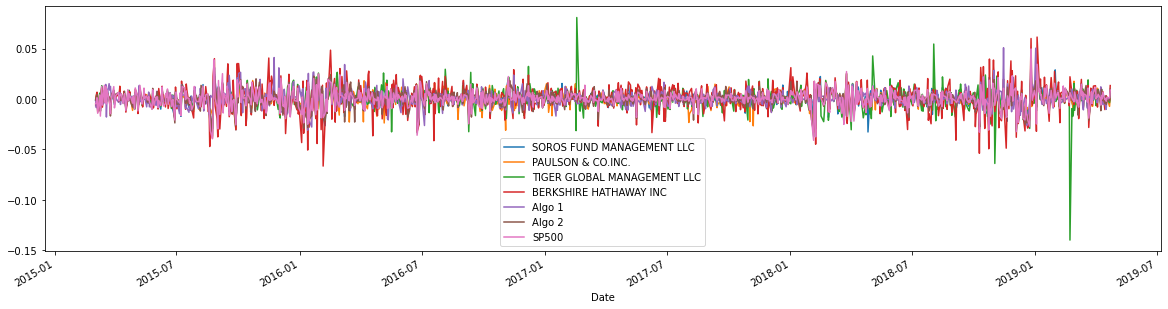

In [117]:
# Plot daily returns of all portfolios
CombinedReturnsDF.plot(figsize = (20,5), legend = True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

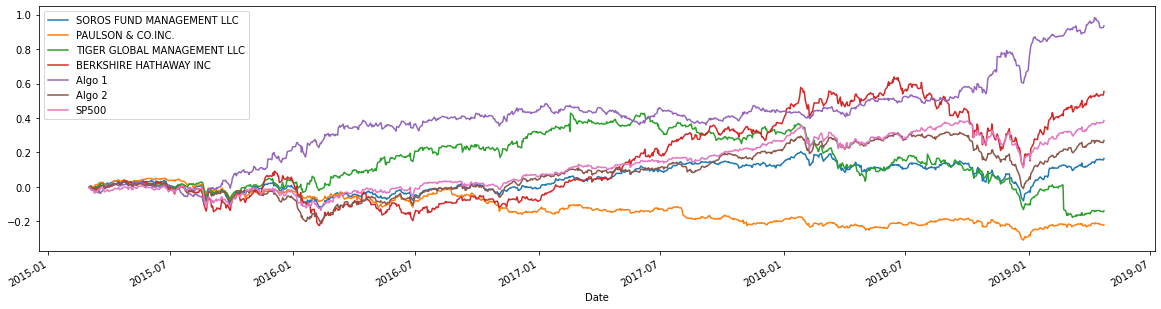

In [118]:
# Calculate cumulative returns of all portfolios
CumulativeReturnsDF = np.cumprod(1+CombinedReturnsDF) -1
# Plot cumulative returns
CumulativeReturnsDF.plot(figsize = (20,5), legend = True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

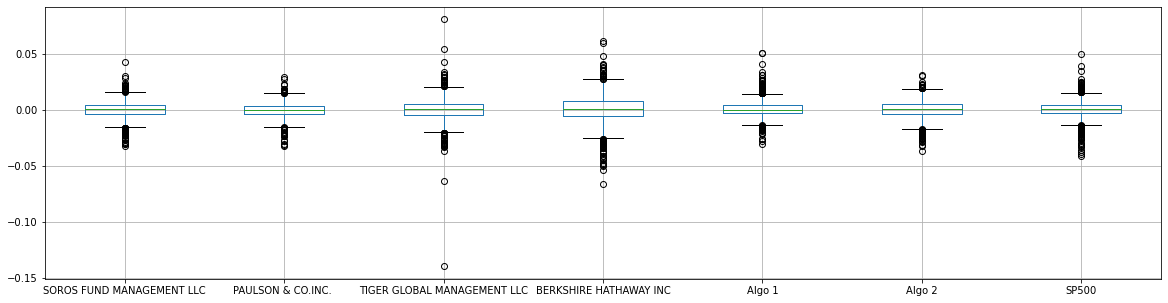

In [119]:
# Box plot to visually show risk
CombinedReturnsDF.boxplot(column  = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SP500'],figsize =(20,5))

### Calculate Standard Deviations

In [120]:
CombinedPortfolioSTD = pd.DataFrame()

In [121]:
# Calculate the daily standard deviations of all portfolios
#CombinedPortfolioSTD.columns = ['Portfolio','StandardDeviation']
CombinedPortfolioSTD = CombinedReturnsDF.std()

In [122]:
CombinedPortfolioSTD

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [123]:
# Calculate  the daily standard deviation of S&P 500
SP500PortfolioSTD = SP500ReturnsDf.std()
SP500PortfolioSTD

SP500    0.008111
dtype: float64

In [124]:
# Determine which portfolios are riskier than the S&P 500; using the same standard deviation in the value as calculated in the combined portfolio dataframe for consistency
CombinedPortfolioSTD  > 0.008554

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [125]:
# Calculate the annualized standard deviation (252 trading days)
CombinedPortfolioSTDAnnualizied = CombinedPortfolioSTD *np.sqrt(252)
CombinedPortfolioSTDAnnualizied

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

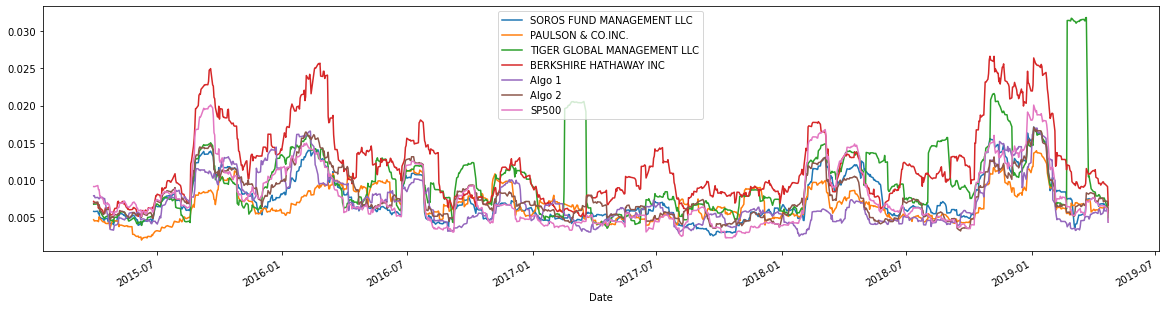

In [126]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
RollingSTD21D  = CombinedReturnsDF.rolling(window = 21).std()
# Plot the rolling standard deviation
RollingSTD21D.plot(figsize = (20,5), legend = True)

### Calculate and plot the correlation

<AxesSubplot:>

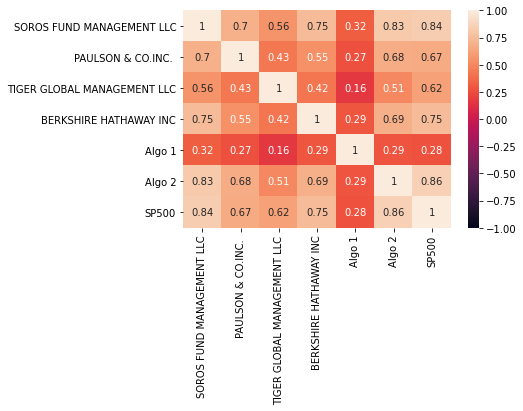

In [127]:
# Calculate the correlation
Correlation = CombinedReturnsDF.corr()
# Display de correlation matrix
sns.heatmap(Correlation, vmin = -1 ,vmax = 1,annot = True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [128]:
# Calculate covariance of a single portfolio
SorosFundManagementCovariance = CombinedReturnsDF['SOROS FUND MANAGEMENT LLC'].cov(CombinedReturnsDF['SP500'])
PaulsonNCoIncCovariance = CombinedReturnsDF['PAULSON & CO.INC. '].cov(CombinedReturnsDF['SP500'])
TigerGlobalManagementCovariance = CombinedReturnsDF['TIGER GLOBAL MANAGEMENT LLC'].cov(CombinedReturnsDF['SP500'])
BerkshireHathwayIncCovariance = CombinedReturnsDF['BERKSHIRE HATHAWAY INC'].cov(CombinedReturnsDF['SP500'])
Algo1IncCovariance = CombinedReturnsDF['Algo 1'].cov(CombinedReturnsDF['SP500'])
Algo2IncCovariance = CombinedReturnsDF['Algo 2'].cov(CombinedReturnsDF['SP500'])

print(f'SOROS FUND MANAGEMENT LLC Covariance: {SorosFundManagementCovariance}\n')
print(f'PAULSON & CO.INC.  Covariance: {PaulsonNCoIncCovariance}\n')
print(f'TIGER GLOBAL MANAGEMENT LLC Covariance: {TigerGlobalManagementCovariance}\n')
print(f'BERKSHIRE HATHAWAY INC Covariance: {BerkshireHathwayIncCovariance}\n')
print(f'Algo 1 Covariance: {Algo1IncCovariance}\n')
print(f'Algo 2 Covariance: {Algo2IncCovariance}\n')

SOROS FUND MANAGEMENT LLC Covariance: 5.6585031972036144e-05

PAULSON & CO.INC.  Covariance: 4.023315093652715e-05

TIGER GLOBAL MANAGEMENT LLC Covariance: 5.814183032305079e-05

BERKSHIRE HATHAWAY INC Covariance: 8.302834941861669e-05

Algo 1 Covariance: 1.8217749991632744e-05

Algo 2 Covariance: 6.12793237414499e-05



In [129]:
# Calculate variance of S&P 500
SP500variance = CombinedReturnsDF['SP500'].var()
SP500variance

7.316632424648712e-05

In [130]:
# Computing beta
SorosFundManagementBeta = SorosFundManagementCovariance / SP500variance
PaulsonNCoIncBeta = PaulsonNCoIncCovariance / SP500variance
TigerGlobalManagementBeta = TigerGlobalManagementCovariance / SP500variance
BerkshireHathwayIncBeta = BerkshireHathwayIncCovariance / SP500variance
Algo1Beta = Algo1IncCovariance / SP500variance
Algo2Beta = Algo2IncCovariance / SP500variance


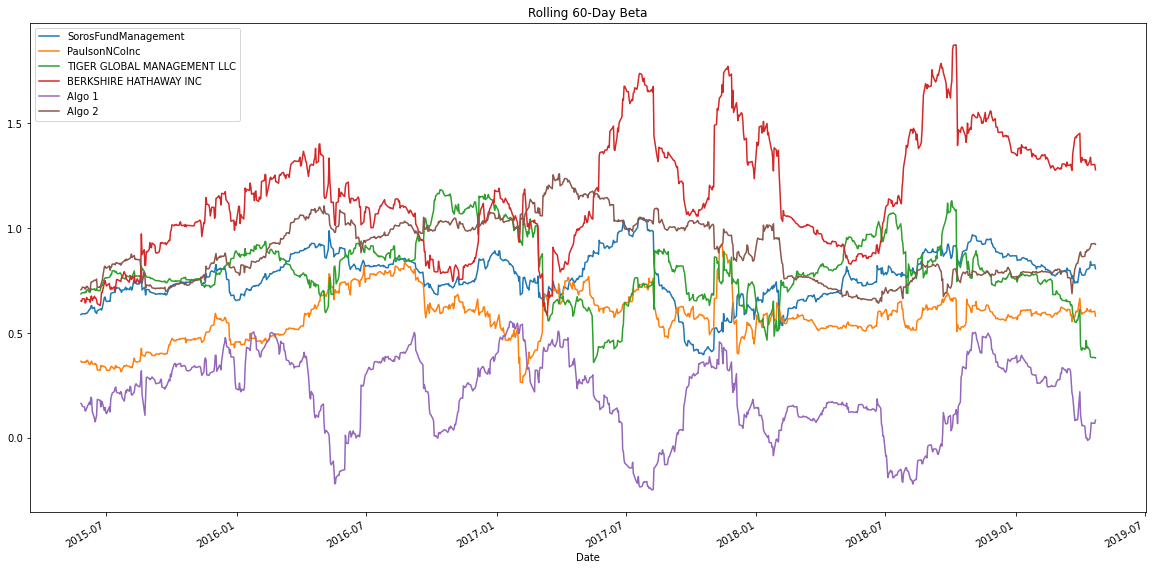

In [131]:
# Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.

RollingSorosFundManagementCovariance = CombinedReturnsDF['SOROS FUND MANAGEMENT LLC'].rolling(window = 60).cov(CombinedReturnsDF['SP500'])
RollingPaulsonNCoIncCovariance = CombinedReturnsDF['PAULSON & CO.INC. '].rolling(window = 60).cov(CombinedReturnsDF['SP500'])
RollingTigerGlobalManagementCovariance = CombinedReturnsDF['TIGER GLOBAL MANAGEMENT LLC'].rolling(window = 60).cov(CombinedReturnsDF['SP500'])
RollingBerkshireHathwayCovariance = CombinedReturnsDF['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(CombinedReturnsDF['SP500'])
RollingAlgo1Covariance = CombinedReturnsDF['Algo 1'].rolling(window = 60).cov(CombinedReturnsDF['SP500'])
RollingAlgo2Covariance = CombinedReturnsDF['Algo 2'].rolling(window = 60).cov(CombinedReturnsDF['SP500'])

RollingSP500variance = CombinedReturnsDF['SP500'].rolling(window=60).var()

RollingSorosFundManagementBeta = RollingSorosFundManagementCovariance / RollingSP500variance
RollingPaulsonNCoIncBeta = RollingPaulsonNCoIncCovariance / RollingSP500variance
RollingTigerGlobalManagementBeta = RollingTigerGlobalManagementCovariance / RollingSP500variance
RollingBerkshireHathwayBeta = RollingBerkshireHathwayCovariance / RollingSP500variance
RollingAlgo1Beta = RollingAlgo1Covariance / RollingSP500variance
RollingAlgo2Beta = RollingAlgo2Covariance / RollingSP500variance

ax = RollingSorosFundManagementBeta.plot(figsize=(20, 10), title='Rolling 60-Day Beta')
RollingPaulsonNCoIncBeta.plot(ax=ax)
RollingTigerGlobalManagementBeta.plot(ax=ax)
RollingBerkshireHathwayBeta.plot(ax=ax)
RollingAlgo1Beta.plot(ax=ax)
RollingAlgo2Beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(['SorosFundManagement', 'PaulsonNCoInc','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

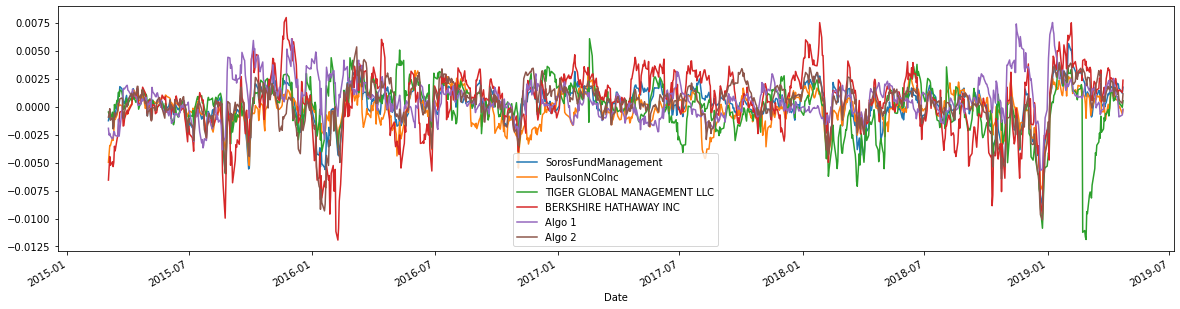

In [132]:
# Use `ewm` to calculate the rolling window
EWMASorosFundManagement = CombinedReturnsDF['SOROS FUND MANAGEMENT LLC'].ewm(span=21, adjust=False).mean()
EWMAPaulsonNCoInc = CombinedReturnsDF['PAULSON & CO.INC. '].ewm(span=21, adjust=False).mean()
EWMATigerGlobalManagement = CombinedReturnsDF['TIGER GLOBAL MANAGEMENT LLC'].ewm(span=21, adjust=False).mean()
EWMABerkshireHathway = CombinedReturnsDF['BERKSHIRE HATHAWAY INC'].ewm(span=21, adjust=False).mean()
EWMAAlgo1 = CombinedReturnsDF['Algo 1'].ewm(span=21, adjust=False).mean()
EWMAAlgo2 = CombinedReturnsDF['Algo 2'].ewm(span=21, adjust=False).mean()

ax = EWMASorosFundManagement.plot(figsize=(20,5),legend = True)
EWMAPaulsonNCoInc.plot(ax=ax)
EWMATigerGlobalManagement.plot(ax=ax)
EWMABerkshireHathway.plot(ax=ax)
EWMAAlgo1.plot(ax=ax)
EWMAAlgo2.plot(ax=ax)

# Set the legend of the figure
ax.legend(['SorosFundManagement', 'PaulsonNCoInc','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2'])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [133]:
# Annualized Sharpe Ratios
PortfolioSharpeRatio =  (CombinedReturnsDF.mean() * 252) /(CombinedPortfolioSTD *np.sqrt(252))
PortfolioSharpeRatio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

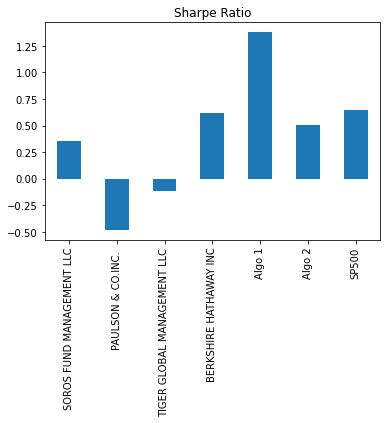

In [134]:
# Visualize the sharpe ratios as a bar plot
PortfolioSharpeRatio.plot.bar(title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [135]:
# Reading data from 1st stock
GoogleCsvPath = Path('Resources/goog_prices.csv')
GooglePricesDf = pd.read_csv(GoogleCsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
GooglePricesDf.rename(columns = {'Close':'GOOGL'},inplace =True)
GooglePricesDf.head(5)

,GOOGL
Date,
2015-01-02,523.37
2015-01-05,512.46
2015-01-06,500.59
2015-01-07,499.73
2015-01-08,501.30


In [136]:
# Reading data from 2nd stock
AmznCsvPath = Path('Resources/amzn_prices.csv')
AmznPricesDf = pd.read_csv(AmznCsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
AmznPricesDf.rename(columns = {'Close':'AMZN'},inplace =True)
AmznPricesDf.head(5)

,AMZN
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


In [137]:
# Reading data from 3rd stock
AaplCsvPath = Path('Resources/aapl_prices.csv')
AaplPricesDf = pd.read_csv(AaplCsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
AaplPricesDf.rename(columns = {'Close':'AAPL'},inplace =True)
AaplPricesDf.head(5)

,AAPL
Date,
2015-01-02,27.33
2015-01-05,26.56
2015-01-06,26.57
2015-01-07,26.94
2015-01-08,27.97


In [138]:
FbCsvPath = Path('Resources/fb_prices.csv')
FbPricesDf = pd.read_csv(FbCsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
FbPricesDf.rename(columns = {'Close':'FB'},inplace =True)
FbPricesDf.head(5)

,FB
Date,
2015-01-02,78.45
2015-01-05,77.19
2015-01-06,76.15
2015-01-07,76.15
2015-01-08,78.18


In [139]:
NflxCsvPath = Path('Resources/Nflx_prices.csv')
NflxPricesDf = pd.read_csv(NflxCsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
NflxPricesDf.rename(columns = {'Close':'NFLX'},inplace =True)
NflxPricesDf.head(5)

,NFLX
Date,
2015-01-02,49.85
2015-01-05,47.31
2015-01-06,46.50
2015-01-07,46.74
2015-01-08,47.78


In [140]:
# Combine all stocks in a single DataFrame
CombinedStockPricesDF = pd.concat([FbPricesDf,AmznPricesDf,AaplPricesDf,NflxPricesDf,GooglePricesDf], axis = 1, join =  'inner' )
CombinedStockPricesDF.head(3)

,FB,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2015-01-02,78.45,308.52,27.33,49.85,523.37
2015-01-05,77.19,302.19,26.56,47.31,512.46
2015-01-06,76.15,295.29,26.57,46.50,500.59


In [141]:
# Reset Date index
#Done while reading the data

In [142]:
# Reorganize portfolio data by having a column per symbol
#Done while setting the dataframe at stock level to keep check on what is read

In [143]:
# Calculate daily returns
DailyReturnsDF = CombinedStockPricesDF.pct_change()
# Drop NAs
DailyReturnsDF.dropna(inplace=True)
# Display sample data
DailyReturnsDF.head()

,FB,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2015-01-05,-0.016061,-0.020517,-0.028174,-0.050953,-0.020846
2015-01-06,-0.013473,-0.022833,0.000377,-0.017121,-0.023163
2015-01-07,0.000000,0.010600,0.013925,0.005161,-0.001718
2015-01-08,0.026658,0.006836,0.038233,0.022251,0.003142
2015-01-09,-0.005628,-0.011749,0.001073,-0.015488,-0.012946


In [144]:
# Set weights
weights = [1/5, 1/5, 1/5,1/5,1/5]

# Calculate portfolio return
PortfolioReturns = DailyReturnsDF.dot(weights)
#Converting into dataframe
PortfolioReturnsDF = PortfolioReturns.to_frame()
PortfolioReturnsDF = PortfolioReturnsDF.rename(columns = {0: 'WeightedReturns'})
# Display sample data
PortfolioReturnsDF.head(5)

,WeightedReturns
Date,
2015-01-05,-0.027310
2015-01-06,-0.015243
2015-01-07,0.005594
2015-01-08,0.019424
2015-01-09,-0.008948


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [145]:
# Join your returns DataFrame to the original returns DataFrame
PortfolioReturnsDF = pd.concat([DailyReturnsDF,PortfolioReturnsDF],axis =1, join = 'inner')
PortfolioReturnsDF.head()

,FB,AMZN,AAPL,NFLX,GOOGL,WeightedReturns
Date,,,,,,
2015-01-05,-0.016061,-0.020517,-0.028174,-0.050953,-0.020846,-0.027310
2015-01-06,-0.013473,-0.022833,0.000377,-0.017121,-0.023163,-0.015243
2015-01-07,0.000000,0.010600,0.013925,0.005161,-0.001718,0.005594
2015-01-08,0.026658,0.006836,0.038233,0.022251,0.003142,0.019424
2015-01-09,-0.005628,-0.011749,0.001073,-0.015488,-0.012946,-0.008948


In [146]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
PortfolioReturnsDF.isna().sum()
#No nulls hence nothing to drop

FB                 0
AMZN               0
AAPL               0
NFLX               0
GOOGL              0
WeightedReturns    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [147]:
# Calculate the annualized `std`
PortfolioReturnsAnnualizedSTD = PortfolioReturnsDF.std() *np.sqrt(252)
PortfolioReturnsAnnualizedSTD

FB                 0.316707
AMZN               0.304775
AAPL               0.293522
NFLX               0.418227
GOOGL              0.267379
WeightedReturns    0.254549
dtype: float64

<AxesSubplot:xlabel='Date'>

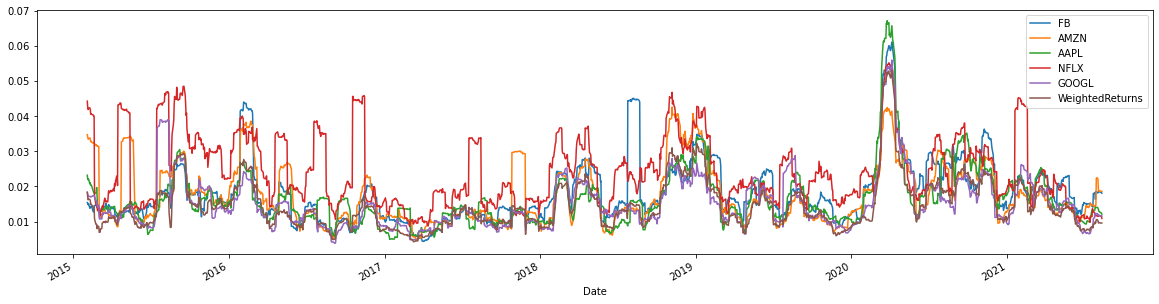

In [148]:
# Calculate rolling standard deviation for 21 day window
RollingSTD21D  = PortfolioReturnsDF.rolling(window = 21).std()
# Plot the rolling standard deviation
RollingSTD21D.plot(figsize = (20,5), legend = True)

### Calculate and plot the correlation

<AxesSubplot:>

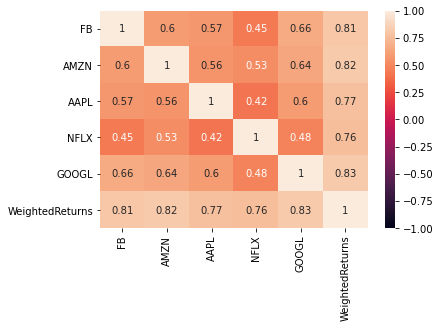

In [149]:
# Calculate the correlation
Correlation = PortfolioReturnsDF.corr()
# Display de correlation matrix
sns.heatmap(Correlation, vmin = -1 ,vmax = 1,annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [150]:
# SP500 Data
Sp500CsvPath = Path('Resources/sp500_prices.csv')
Sp500PricesDf = pd.read_csv(Sp500CsvPath, index_col = 'Date', infer_datetime_format = True,parse_dates = True)
Sp500PricesDf.rename(columns = {'Close':'SP500'},inplace =True)
Sp500PricesDf.head(5)

,SP500
Date,
2015-01-02,2058.20
2015-01-05,2020.58
2015-01-06,2002.61
2015-01-07,2025.90
2015-01-08,2062.14


In [151]:
#Calculate Daily Returns of SP500
Sp500ReturnsDf = Sp500PricesDf.pct_change()
Sp500ReturnsDf.dropna(inplace=True)
Sp500ReturnsDf.head(5)

,SP500
Date,
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888
2015-01-09,-0.008404


 SP500 Variance : 0.00013165965372213137
 Portfolio Covariance: 0.00014044920174698976
 Portfolio Beta: 1.0667596167570728


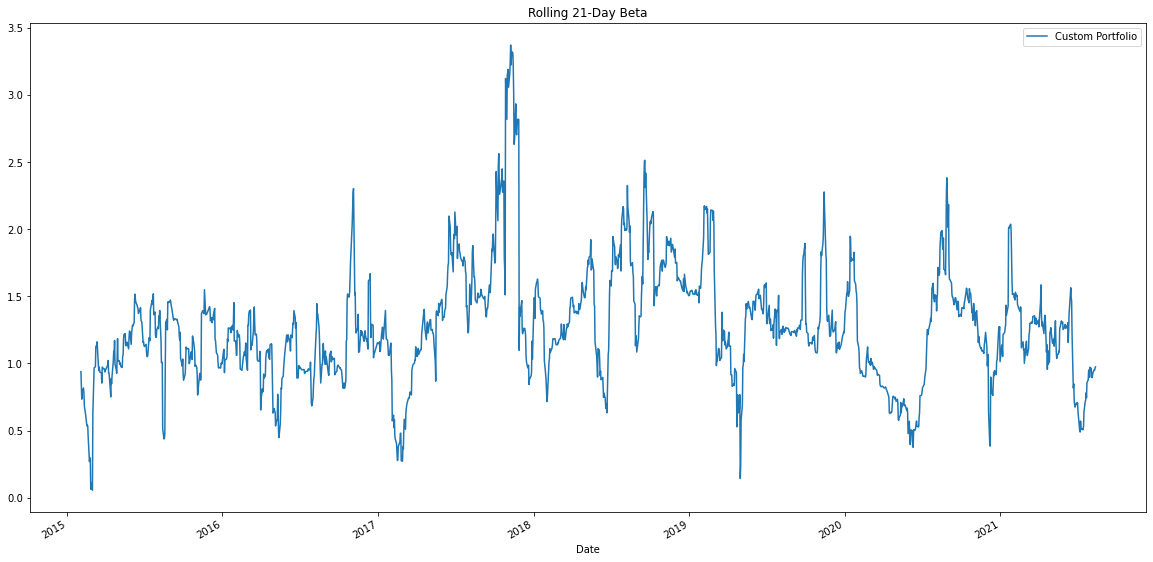

In [152]:
# Calculate Beta
PortfolioReturnsCovariance = PortfolioReturnsDF['WeightedReturns'].cov(Sp500ReturnsDf['SP500'])
SP500variance = Sp500ReturnsDf['SP500'].var()
print(f' SP500 Variance : {SP500variance}')
print(f' Portfolio Covariance: {PortfolioReturnsCovariance}')
Beta = PortfolioReturnsCovariance/SP500variance
print(f' Portfolio Beta: {Beta}')

#Plot Beta
RollingPortfolioCovariance = PortfolioReturnsDF['WeightedReturns'].rolling(window = 21).cov(Sp500ReturnsDf['SP500'])
RollingSP500variance = Sp500ReturnsDf['SP500'].rolling(window=21).var()
RollingPortfolioBeta = RollingPortfolioCovariance / RollingSP500variance

ax = RollingPortfolioBeta.plot(figsize=(20, 10), title='Rolling 21-Day Beta')

# Set the legend of the figure
ax.legend(['Custom Portfolio'])

In [153]:
# Calculate Annualzied Sharpe Ratios for portfolio
PortfolioSharpeRatio =  (PortfolioReturnsDF.mean() * 252) /(PortfolioReturnsDF.std() *np.sqrt(252))
PortfolioSharpeRatio

#Converting into dataframe
PortfolioSharpeRatioDF = PortfolioSharpeRatio.to_frame()
PortfolioSharpeRatioDF = PortfolioSharpeRatioDF.rename(columns = {0: 'SharpeRatio'})
# Display sample data
PortfolioSharpeRatioDF.head(10)

,SharpeRatio
FB,0.891539
AMZN,1.329896
AAPL,1.021940
NFLX,1.049632
GOOGL,1.076720
WeightedReturns,1.347103


In [154]:
# Calculate Annualzied Sharpe Ratios for SP500
SPSharpeRatio =  (Sp500ReturnsDf.mean() * 252) /(Sp500ReturnsDf.std() *np.sqrt(252))
SPSharpeRatio

#Converting into dataframe
SPSharpeRatioDF = SPSharpeRatio.to_frame()
SPSharpeRatioDF = SPSharpeRatioDF.rename(columns = {0: 'SharpeRatio'})
# Display sample data
SPSharpeRatioDF.head(10)

,SharpeRatio
SP500,0.734833


In [155]:
#Combined Sharpe ratio DF
CombinedSharpeRatioDF = pd.concat([PortfolioSharpeRatioDF,SPSharpeRatioDF],axis = 0, join = 'inner')
CombinedSharpeRatioDF

,SharpeRatio
FB,0.891539
AMZN,1.329896
AAPL,1.021940
NFLX,1.049632
GOOGL,1.076720
WeightedReturns,1.347103
SP500,0.734833


<AxesSubplot:title={'center':'Sharpe Ratio'}>

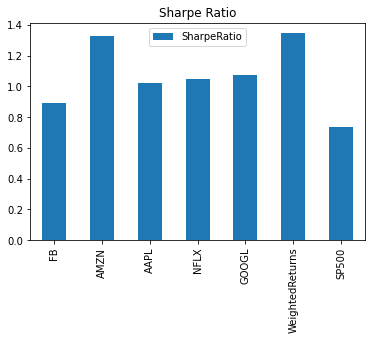

In [156]:
# Visualize the sharpe ratios as a bar plot
CombinedSharpeRatioDF.plot(kind = 'bar',title='Sharpe Ratio')

### How does your portfolio do?

Custom portfolio is a perfect example of risk-reward equation - Higher the risk, higher is the reward. Plot for sharpe ratio shows that each of the selected individual stocks have a higher sharpe ratio compared to S&P but each of them also has a higher returns compared to S&P index. S&P and the stocks in the custom portfolio are highly correlated and can be noted from the heatmap plotted. Rolling standard deviation also provides a view of behaviour of the stocks in custom portfolio to S&P 500 and their variance over a period is not far away from each other. Overall portfolio has performed very well with marginally higher degree of risk it has also provided greater returns.